In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('AutoMobileData.csv')

In [3]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,85,subaru,gas,std,four,wagon,4wd,front,96.9,...,108,2bbl,3.62,2.64,9.0,82,4800,23,29,8013
1,0,85,subaru,gas,turbo,four,wagon,4wd,front,96.9,...,108,mpfi,3.62,2.64,7.7,111,4800,23,23,11694
2,1,87,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,35,39,5348
3,1,87,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6338
4,1,74,toyota,gas,std,four,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,?,isuzu,gas,std,four,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785
201,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
202,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
203,2,?,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048


<AxesSubplot:>

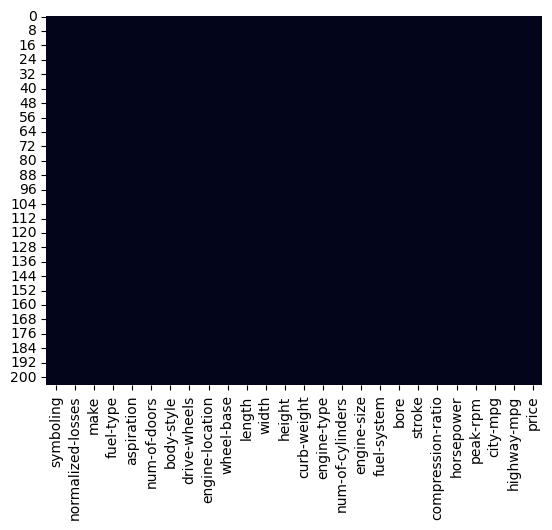

In [4]:
sns.heatmap(df.isnull(), cbar=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
# Çoğu araba 0,1,2'de bulunuyor
df['symboling'].astype('category').value_counts()

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

In [7]:
# aspiration: Motor özelliğini, atm ve turbo başınç olup olmadığı gösteri
df['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [8]:
# drivewheel: Ön, arka veya Dört tekerlekten olan çekiş
df['drive-wheels'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


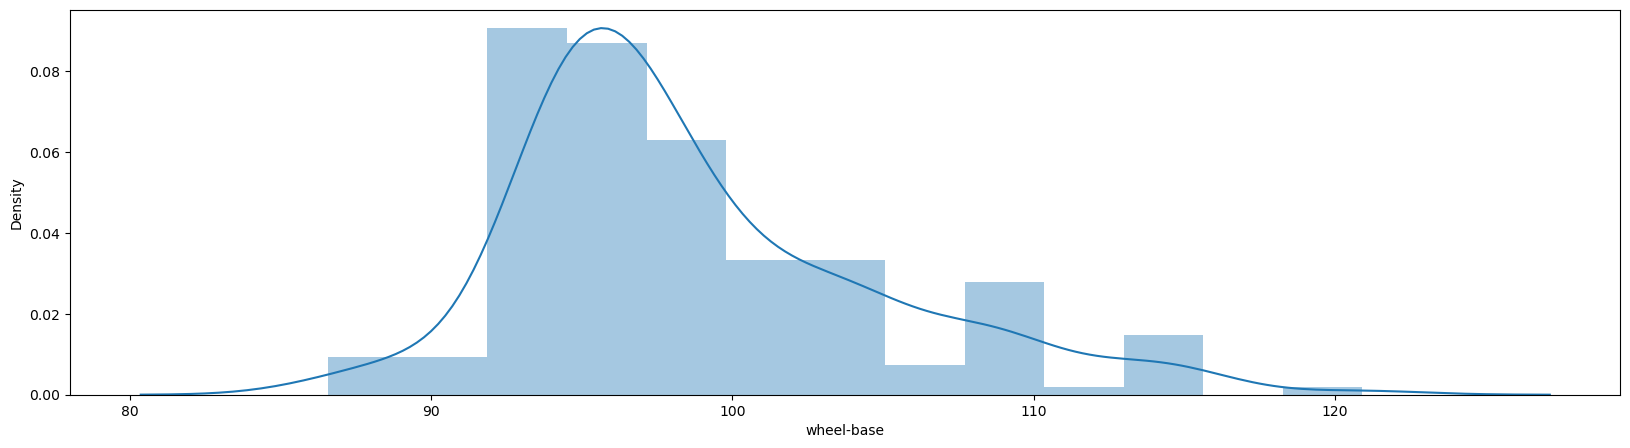

In [9]:
# wheelbase: ön ve arka tekerlekler arasındaki mesafe
plt.figure(figsize=(20,5))
sns.distplot(df['wheel-base'])
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


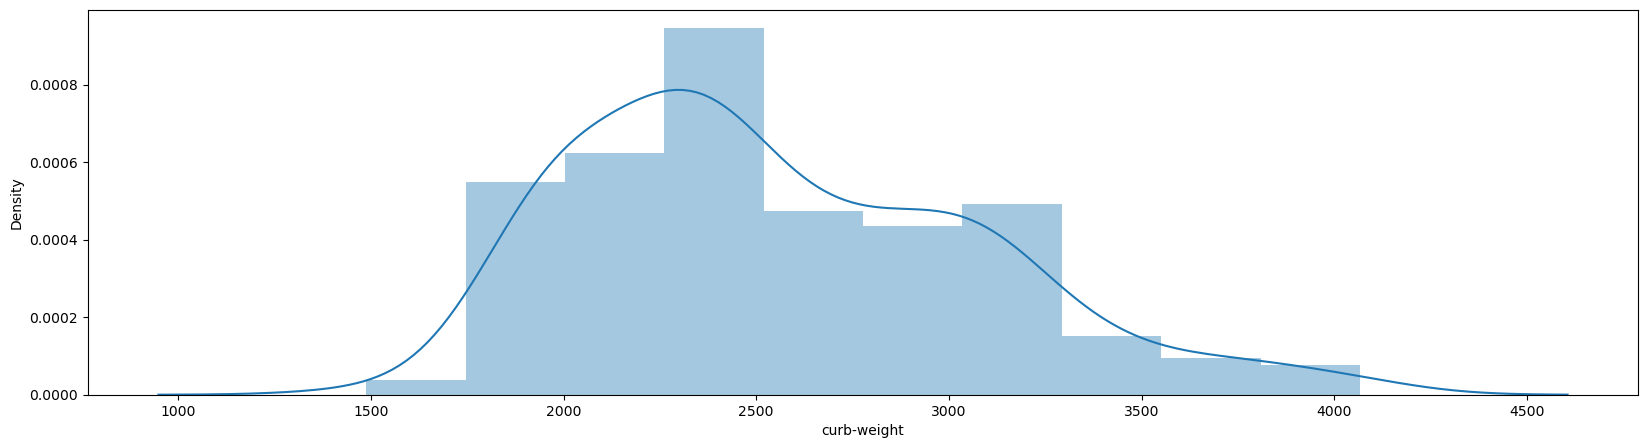

In [10]:
plt.figure(figsize=(20,5))
sns.distplot(df['curb-weight'])
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: '?'

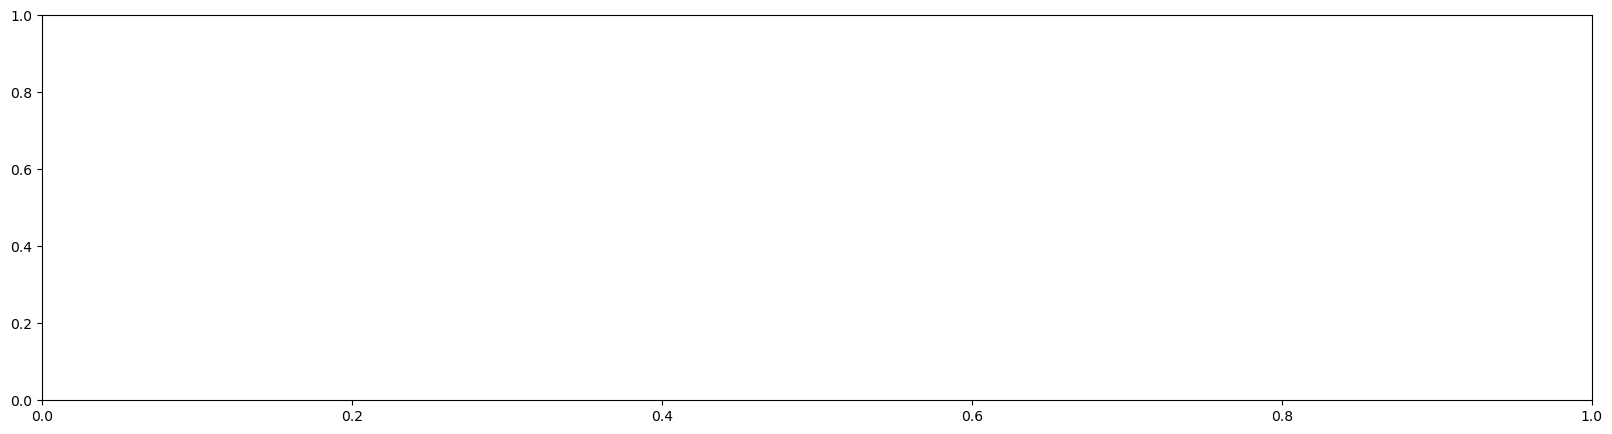

In [11]:
# stroke: Motorun hacmi (her çevrimde pistonun kat ettiği mesafe)
plt.figure(figsize=(20,5))
sns.distplot(df['stroke'])
plt.show()

# "?" Hatasın NaN dan dolayı mı kaynaklanıyor?

In [12]:
df=df.replace('?', np.NaN)

<AxesSubplot:>

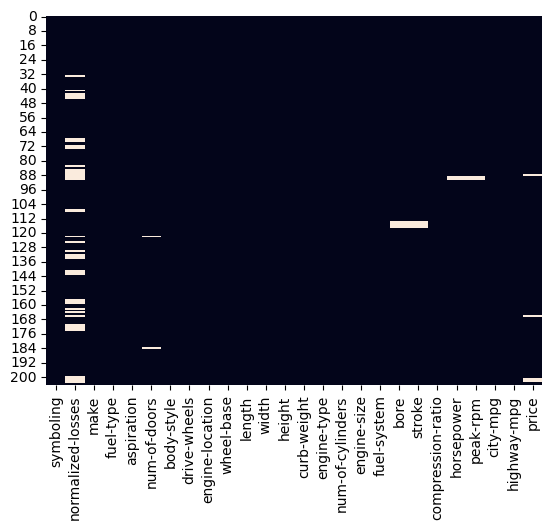

In [13]:
sns.heatmap(df.isnull(), cbar=False)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [15]:
example = df.dropna(how='any',axis=0) 

In [16]:
example.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    object 
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non

In [17]:
df['normalized-losses']=pd.to_numeric(df['normalized-losses'])
df['engine-size']=pd.to_numeric(df['engine-size'])
df['bore']=pd.to_numeric(df['bore'])
df['stroke']=pd.to_numeric(df['stroke'])
df['horsepower']=pd.to_numeric(df['horsepower'])
df['peak-rpm']=pd.to_numeric(df['peak-rpm'])
df['price']=pd.to_numeric(df['price'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [19]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [20]:
mean_value=df['normalized-losses'].mean()
df['normalized-losses'].fillna(value=mean_value, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,85.0,subaru,gas,std,four,wagon,4wd,front,96.9,...,108,2bbl,3.62,2.64,9.0,82.0,4800.0,23,29,8013.0
1,0,85.0,subaru,gas,turbo,four,wagon,4wd,front,96.9,...,108,mpfi,3.62,2.64,7.7,111.0,4800.0,23,23,11694.0
2,1,87.0,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62.0,4800.0,35,39,5348.0
3,1,87.0,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62.0,4800.0,31,38,6338.0
4,1,74.0,toyota,gas,std,four,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62.0,4800.0,31,38,6488.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [23]:
example = df.dropna(how='any',axis=0) 

In [24]:
example.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   normalized-losses  193 non-null    float64
 2   make               193 non-null    object 
 3   fuel-type          193 non-null    object 
 4   aspiration         193 non-null    object 
 5   num-of-doors       193 non-null    object 
 6   body-style         193 non-null    object 
 7   drive-wheels       193 non-null    object 
 8   engine-location    193 non-null    object 
 9   wheel-base         193 non-null    float64
 10  length             193 non-null    float64
 11  width              193 non-null    float64
 12  height             193 non-null    float64
 13  curb-weight        193 non-null    int64  
 14  engine-type        193 non-null    object 
 15  num-of-cylinders   193 non-null    object 
 16  engine-size        193 non

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


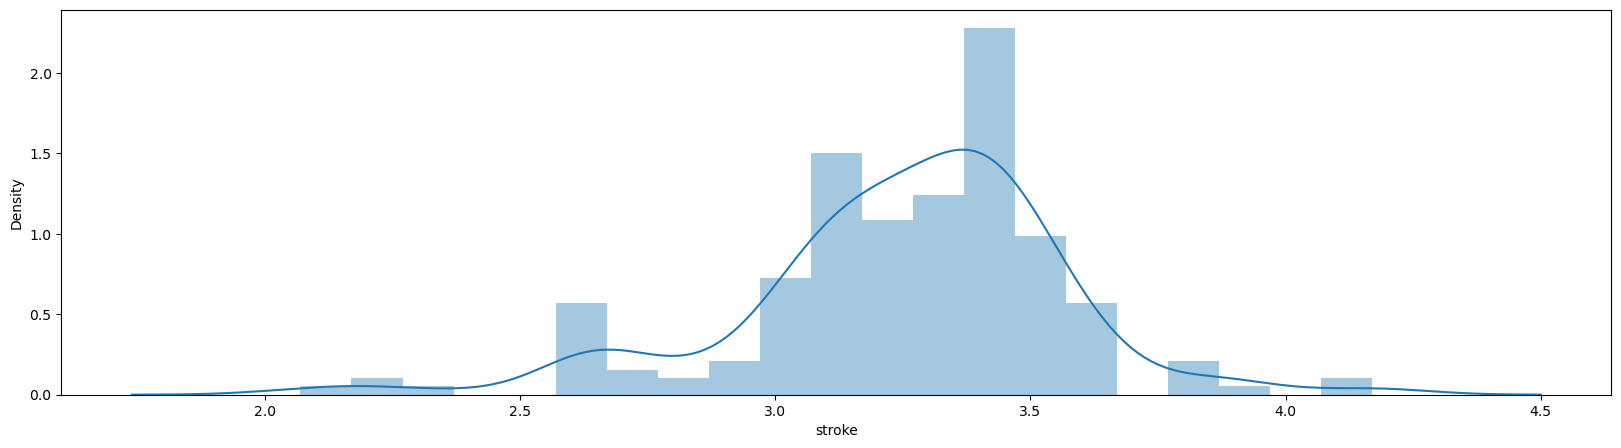

In [25]:
# stroke: Motorun hacmi (her çevrimde pistonun kat ettiği mesafe)
plt.figure(figsize=(20,5))
sns.distplot(example['stroke'])
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


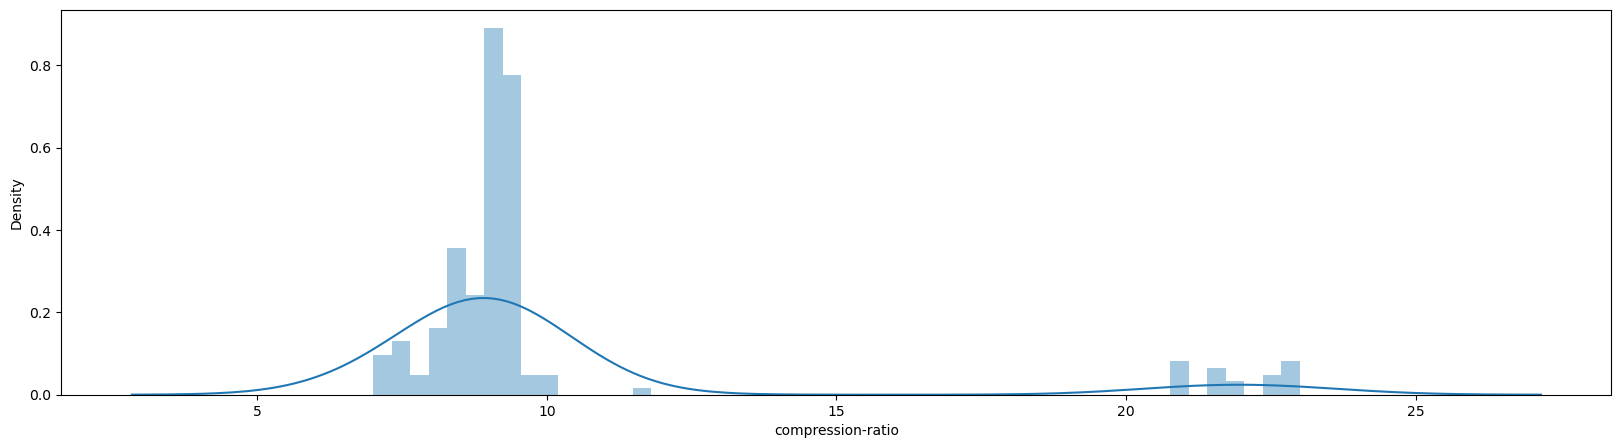

In [26]:
# compression ration: En yüksek kapasitedeki sıkıştırma odası hacminin en düşük kapasiteye oranı
plt.figure(figsize=(20,5))
sns.distplot(example['compression-ratio'])
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


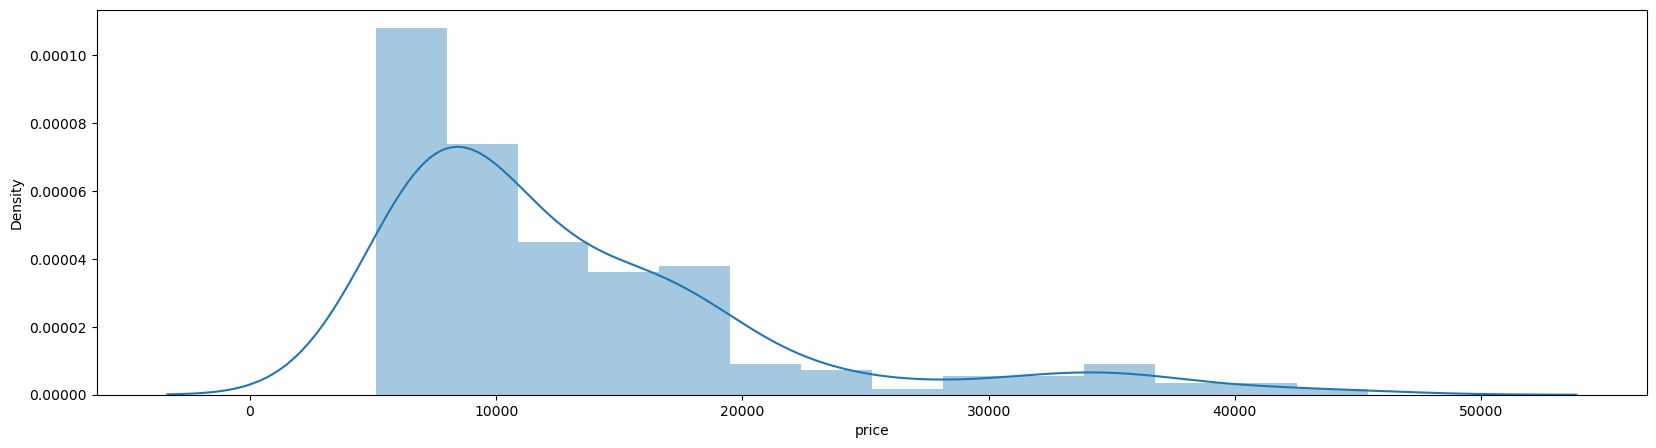

In [27]:
# target variable: Araba fiyatı
plt.figure(figsize=(20,5))
sns.distplot(example['price'])
plt.show()

In [28]:
# Veri kümesindeki tüm sayısal (float ve int) değişkenler
cars_numeric = example.select_dtypes(include=['float', 'int'])
cars_numeric.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,85.0,96.9,173.6,65.4,54.9,2420,108,3.62,2.64,9.0,82.0,4800.0,23,29,8013.0
1,0,85.0,96.9,173.6,65.4,54.9,2650,108,3.62,2.64,7.7,111.0,4800.0,23,23,11694.0
2,1,87.0,95.7,158.7,63.6,54.5,1985,92,3.05,3.03,9.0,62.0,4800.0,35,39,5348.0
3,1,87.0,95.7,158.7,63.6,54.5,2040,92,3.05,3.03,9.0,62.0,4800.0,31,38,6338.0
4,1,74.0,95.7,158.7,63.6,54.5,2015,92,3.05,3.03,9.0,62.0,4800.0,31,38,6488.0


In [29]:
# Simgeleme ve car_ID siliniyor
cars_numeric = cars_numeric.drop(['symboling'], axis=1)
cars_numeric.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,85.0,96.9,173.6,65.4,54.9,2420,108,3.62,2.64,9.0,82.0,4800.0,23,29,8013.0
1,85.0,96.9,173.6,65.4,54.9,2650,108,3.62,2.64,7.7,111.0,4800.0,23,23,11694.0
2,87.0,95.7,158.7,63.6,54.5,1985,92,3.05,3.03,9.0,62.0,4800.0,35,39,5348.0
3,87.0,95.7,158.7,63.6,54.5,2040,92,3.05,3.03,9.0,62.0,4800.0,31,38,6338.0
4,74.0,95.7,158.7,63.6,54.5,2015,92,3.05,3.03,9.0,62.0,4800.0,31,38,6488.0


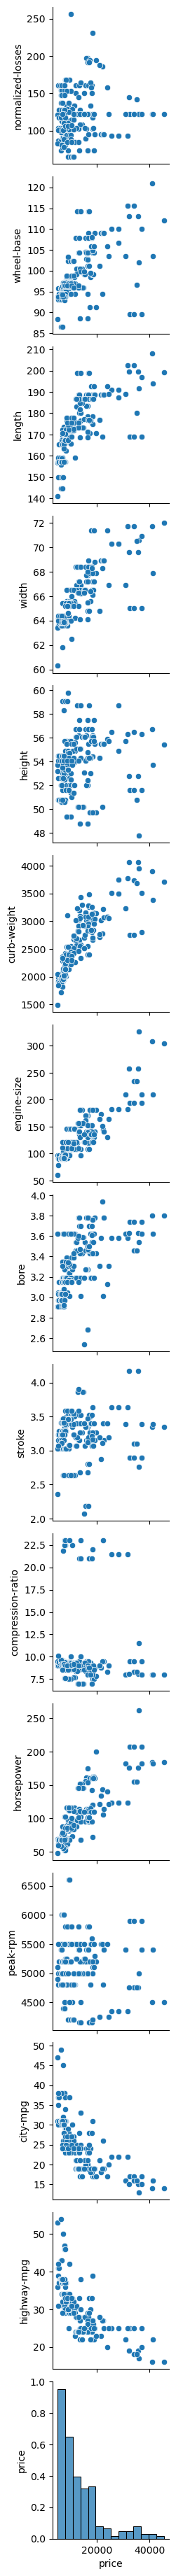

In [30]:
# İkili dağılım grafiği
sns.pairplot(cars_numeric,x_vars=['price'])
plt.show()

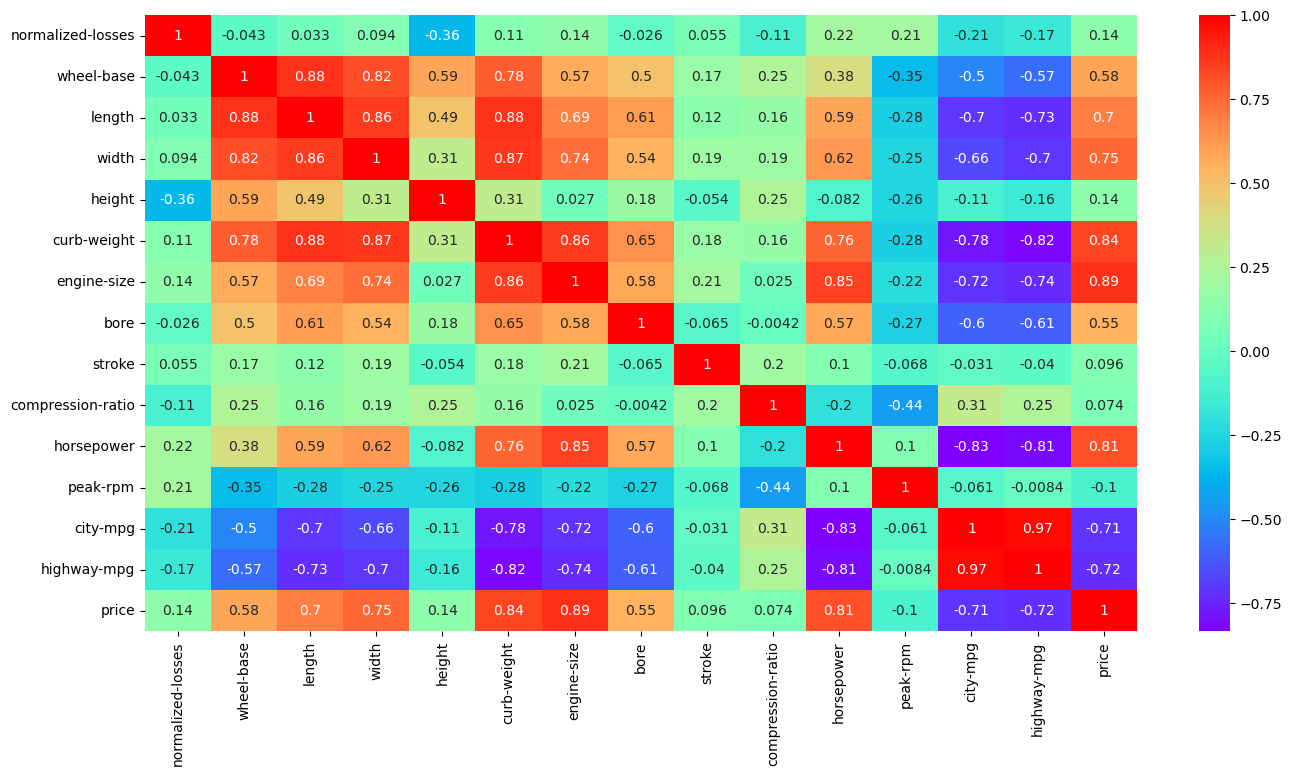

In [33]:
# Korelasyon matrisi
cor = cars_numeric.corr()
cor

# Şekil büyüklüğü
plt.figure(figsize=(16,8))

# Sıcaklık haritası
sns.heatmap(cor, cmap="rainbow", annot=True)
plt.show()

# Isı haritasına bakarak çıkarılacak Bilgiler:

Fiyatın bağımsız değişkenlerle korelasyonu:
- Price; Wheelbase, car length, car width, curb weight, engine size, horsepower ile yüksek oranda (pozitif) ilişkilidir 
- Price, citympg ve highwaympg  ile negatif ilişkilidir (yaklaşık -0,70 arasında). Bu, yüksek kilometre performansına sahip arabaların "economy" araba kategorisine girebileceğini ve daha düşük fiyatlı olabileceğini düşündürür 

Bağımsız değişkenler arasındaki korelasyon:
- Pek çok bağımsız değişken yüksek oranda ilişkilidir (matrisin sol üst kısmında): wheelbase, car length, curb weight, engine size gibi özellikler 'size/weight' ölçütleridir ve pozitif olarak ilişkilidir
- Bu nedenle, çoklu bağlantılar büyük bir öneme sahip

In [37]:
example['make'][:30]

0     subaru
1     subaru
2     toyota
3     toyota
4     toyota
5     toyota
6     toyota
7     toyota
8     toyota
9     toyota
10    toyota
11    toyota
12    toyota
13    toyota
14    toyota
15    toyota
16    toyota
17    toyota
18    toyota
19    toyota
20    toyota
21    toyota
22    toyota
23    toyota
24    toyota
25    toyota
26    toyota
27    toyota
28    toyota
29    toyota
Name: make, dtype: object

In [38]:
import re
# regex: boşluktan önceki herhangi bir alfas ayısal dizisi
p = re.compile(r'\w+-?\w+')
carnames = example['make'].apply(lambda x: re.findall(p, x)[0])
print(carnames)

0      subaru
1      subaru
2      toyota
3      toyota
4      toyota
        ...  
198     honda
199     honda
200     isuzu
203     isuzu
204    jaguar
Name: make, Length: 193, dtype: object


In [39]:
# Yeni sütun ekleniyor "car_company" adında
cars=example.copy()
cars['car_company'] = cars['make'].apply(lambda x: re.findall(p, x)[0])
# Tüm değerlere bakıyor
cars['car_company'].astype('category').value_counts()

toyota           32
nissan           18
honda            13
mitsubishi       13
volkswagen       12
subaru           12
mazda            12
volvo            11
peugot           11
bmw               8
dodge             8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
mercury           1
Name: car_company, dtype: int64

In [40]:
cars = cars.drop('make', axis=1)

In [41]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    object 
 1   normalized-losses  193 non-null    float64
 2   fuel-type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num-of-doors       193 non-null    object 
 5   body-style         193 non-null    object 
 6   drive-wheels       193 non-null    object 
 7   engine-location    193 non-null    object 
 8   wheel-base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb-weight        193 non-null    int64  
 13  engine-type        193 non-null    object 
 14  num-of-cylinders   193 non-null    object 
 15  engine-size        193 non-null    int64  
 16  fuel-system        193 non

In [42]:
# Aykırı değerler
cars.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,121.284974,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,32.342674,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,95.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,122.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,134.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000
max,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [43]:
# X ve y'ye bölündü
X = cars.loc[:, ['symboling','normalized-losses', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'car_company']]

y = cars['price']

In [44]:
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()

,symboling,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,car_company
0,0,gas,std,four,wagon,4wd,front,ohcf,four,2bbl,subaru
1,0,gas,turbo,four,wagon,4wd,front,ohcf,four,mpfi,subaru
2,1,gas,std,two,hatchback,fwd,front,ohc,four,2bbl,toyota
3,1,gas,std,two,hatchback,fwd,front,ohc,four,2bbl,toyota
4,1,gas,std,four,hatchback,fwd,front,ohc,four,2bbl,toyota


In [45]:
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fuel-type_gas,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,...,car_company_mitsubishi,car_company_nissan,car_company_peugot,car_company_plymouth,car_company_porsche,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [46]:
# Kategorik değişkenleri temizleniyor
X = X.drop(list(cars_categorical.columns), axis=1)

In [47]:
X = pd.concat([X, cars_dummies], axis=1)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg']]=scaler.fit_transform(X_train[['wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg']])
X_train.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,car_company_mitsubishi,car_company_nissan,car_company_peugot,car_company_plymouth,car_company_porsche,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
171,122.0,0.738073,1.165277,0.492124,0.808137,0.950221,0.812145,-0.071651,-0.149570,-0.234773,...,0,0,0,0,0,0,0,0,0,0
185,110.0,0.706070,0.040445,-0.579436,2.551330,-0.025477,-0.142033,0.036225,0.672728,-0.375624,...,0,0,0,0,0,0,0,0,0,0
93,150.0,0.034017,0.977805,0.305765,0.978204,0.297254,-0.164751,-2.840459,-3.560583,-0.150262,...,0,0,0,0,0,1,0,0,0,0
77,119.0,-0.830050,-1.310915,-0.952152,-1.275193,-1.183179,-0.869025,-1.294241,-0.027748,-0.122092,...,0,0,0,1,0,0,0,0,0,0
64,194.0,-1.214081,-0.264197,0.958019,-1.742879,1.107834,1.198360,0.359852,0.094074,-0.572815,...,0,1,0,0,0,0,0,0,0,0


In [50]:
X_test[['wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg']]=scaler.transform(X_test[['wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg']])
X_test.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,car_company_mitsubishi,car_company_nissan,car_company_peugot,car_company_plymouth,car_company_porsche,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
119,115.0,-0.013986,0.290408,0.305765,0.723103,-0.260019,-0.142033,0.216018,0.459539,-0.347454,...,0,0,0,0,0,0,0,0,0,0
128,93.0,1.250113,1.048107,2.076168,0.468001,1.775812,1.243797,0.899230,1.220926,3.286505,...,0,0,0,0,0,0,0,0,0,0
11,91.0,-0.510025,-0.607895,-0.672615,-0.424854,-0.513325,-0.414655,-0.215485,0.337717,3.568207,...,0,0,0,0,0,0,0,1,0,0
136,161.0,-0.830050,-1.310915,-0.672615,-1.275193,-1.134395,-0.823588,-1.294241,-0.027748,-0.122092,...,1,0,0,0,0,0,0,0,0,0
134,122.0,0.610063,0.337276,1.004608,0.425484,0.678152,0.266901,1.618401,-0.362759,-0.516475,...,0,0,0,0,0,0,0,0,0,0


# Ridge Regression Modeli Oluşturma

In [51]:
# Ayarlanacak alfa listesi
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# Çapraz doğrulama
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006445,0.006062,0.001601,0.003203,0.0001,{'alpha': 0.0001},-3092.966907,-2047.724558,-2488.566960,-2137.893173,...,-2436.985414,367.238772,24,-758.518793,-933.265863,-643.222329,-963.825544,-961.814904,-852.129487,129.224746
1,0.003813,0.005178,0.000607,0.001215,0.001,{'alpha': 0.001},-3078.366848,-2038.875348,-2478.963218,-2139.798935,...,-2425.326664,363.706749,23,-759.225347,-936.950230,-642.901011,-964.952049,-962.274470,-853.260621,129.966721
2,0.003301,0.003145,0.000000,0.000000,0.01,{'alpha': 0.01},-2971.535963,-1975.454864,-2406.935751,-2191.743524,...,-2358.715028,336.131351,21,-766.673843,-956.381959,-651.991926,-973.648701,-968.056404,-863.350567,130.998240
3,0.000000,0.000000,0.003222,0.003947,0.05,{'alpha': 0.05},-2787.576084,-1894.373487,-2308.580557,-2314.370265,...,-2280.181328,297.386277,17,-802.807931,-989.435761,-711.805618,-996.369028,-1008.275548,-901.738777,121.538180
4,0.003133,0.006266,0.000000,0.000000,0.1,{'alpha': 0.1},-2684.955884,-1898.805003,-2311.993191,-2347.723128,...,-2266.399676,264.820006,14,-837.006449,-1009.755197,-749.058404,-1017.997784,-1043.589593,-931.481486,116.947668


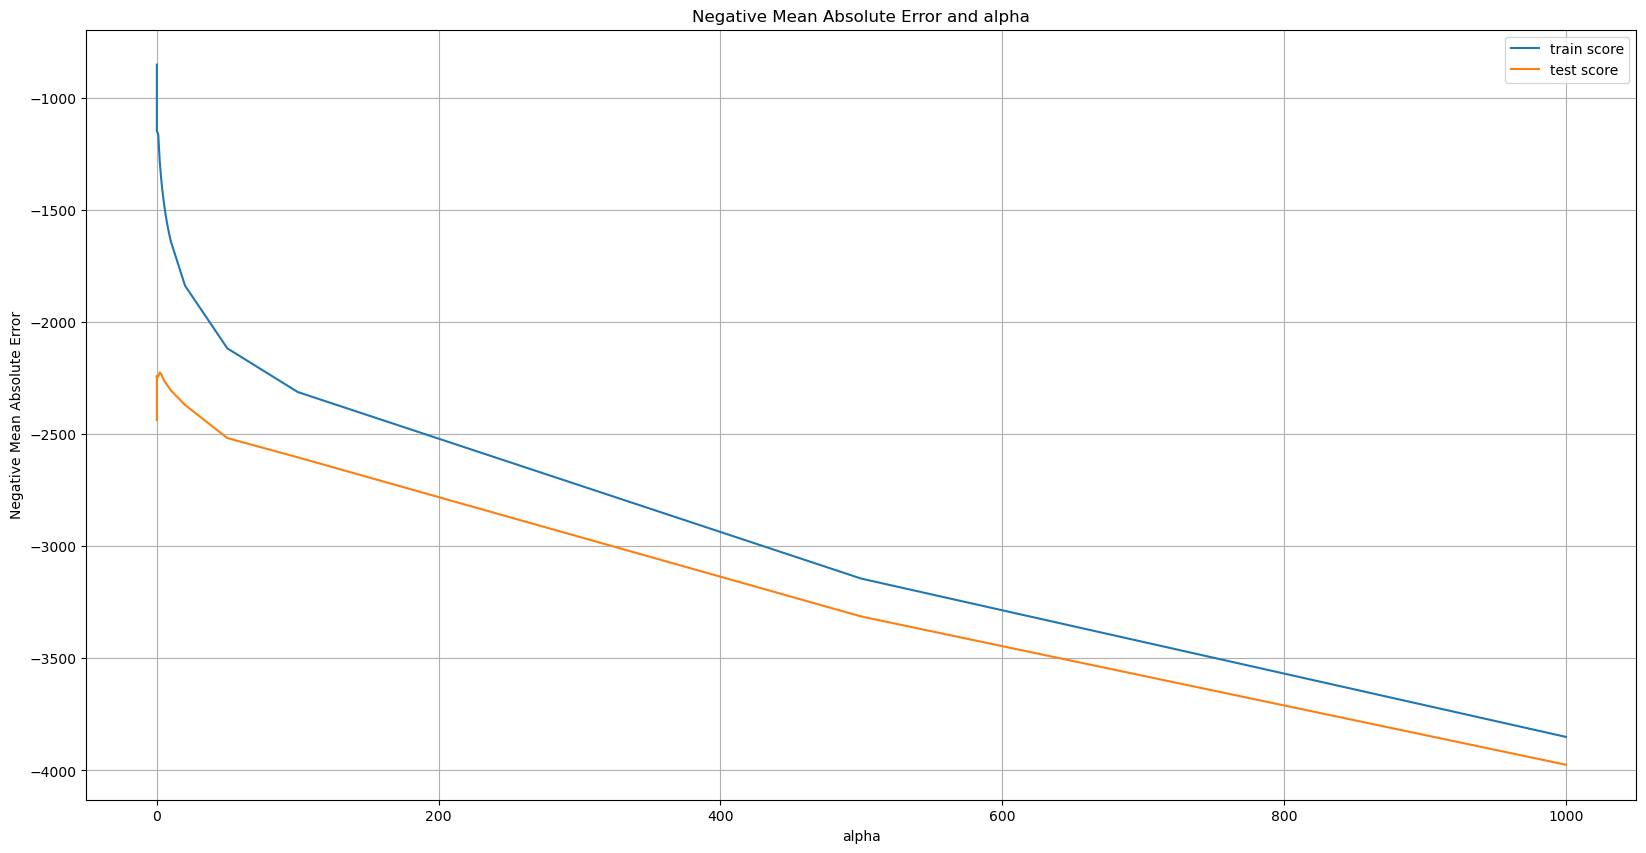

In [53]:
# Alfa ile ortalama testi ve tren skolarını çizme 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')

plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [54]:
cv_results = cv_results[cv_results['param_alpha']<=200]

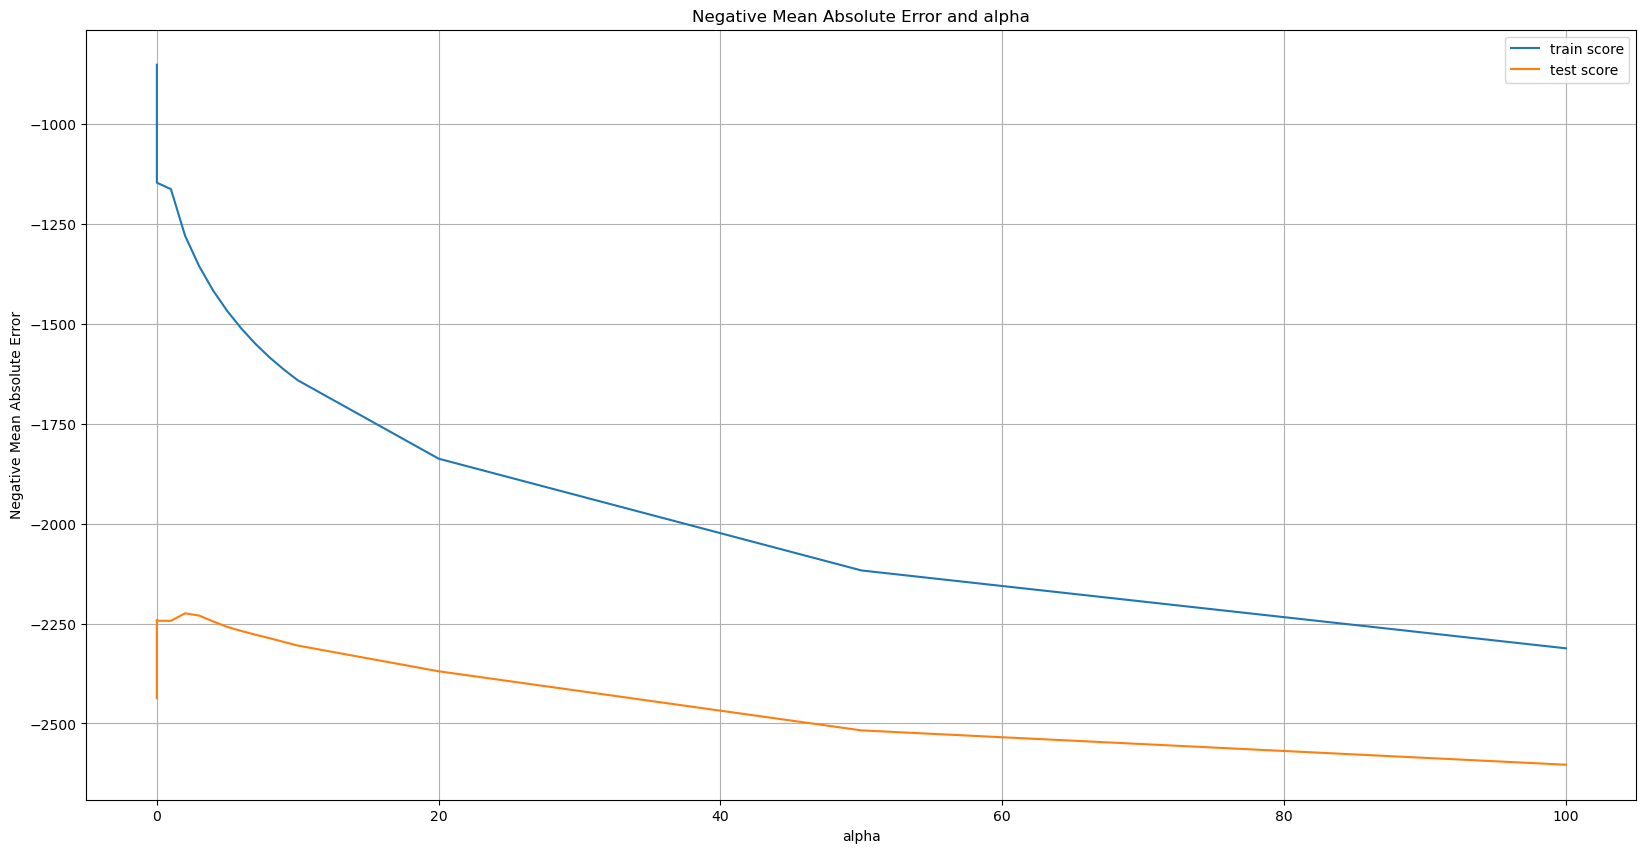

In [55]:
# Alfa ile ortalama testi ve tren skolarını çizme
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')

plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [56]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([  -10.20813289,   508.30552092,   254.31948859,   991.74418356,
         125.74723398,  1031.66250069,  2953.48668627,    38.30829552,
        -631.5910991 ,   252.88360926,  1743.16637637,   479.68273664,
         -59.56557465,   114.82176439,  -310.18064805,     7.18586708,
         494.31391775,  -502.78098779,   499.88911777,  -155.39933388,
         102.06212924,   406.9087493 ,   121.16260326,  -592.82725579,
         236.16540833,  -760.2255172 ,  -678.81553196,   823.73260823,
         975.22283245,  -550.53487576,   788.20672728,   529.37620064,
        -778.50140469,   110.14313501, -1252.32201869,   464.34477945,
           0.        ,  -306.79891628,   125.3462882 ,   155.39933388,
        -128.37189194,    10.13572626,  -254.83381536,   -27.14459642,
          98.34965002,  1340.56413791,   -13.6278165 ,   -94.89015907,
         223.49249251,  -160.39236459,    69.6459796 ,   -43.21343239,
        1166.08081244,     0.        ,  -497.52537221, -1096.74101716,
      

In [57]:
imp_ridge = pd.DataFrame({
    "Varname": X_train.columns,
    "Coefficient": ridge.coef_})
imp_ridge.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
6,engine-size,2953.486686
10,horsepower,1743.166376
45,car_company_bmw,1340.564138
52,car_company_mercedes-benz,1166.080812
58,car_company_porsche,1124.488945
...,...,...
25,body-style_wagon,-760.225517
32,engine-type_ohcv,-778.501405
61,car_company_toyota,-874.811871
55,car_company_nissan,-1096.741017


In [58]:
imp_ridge=imp_ridge.drop([imp_ridge.index[56], imp_ridge.index[43],imp_ridge.index[46]])
imp_ridge.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
6,engine-size,2953.486686
10,horsepower,1743.166376
45,car_company_bmw,1340.564138
52,car_company_mercedes-benz,1166.080812
58,car_company_porsche,1124.488945
...,...,...
25,body-style_wagon,-760.225517
32,engine-type_ohcv,-778.501405
61,car_company_toyota,-874.811871
55,car_company_nissan,-1096.741017


In [59]:
y_pred = ridge.predict(X_test)

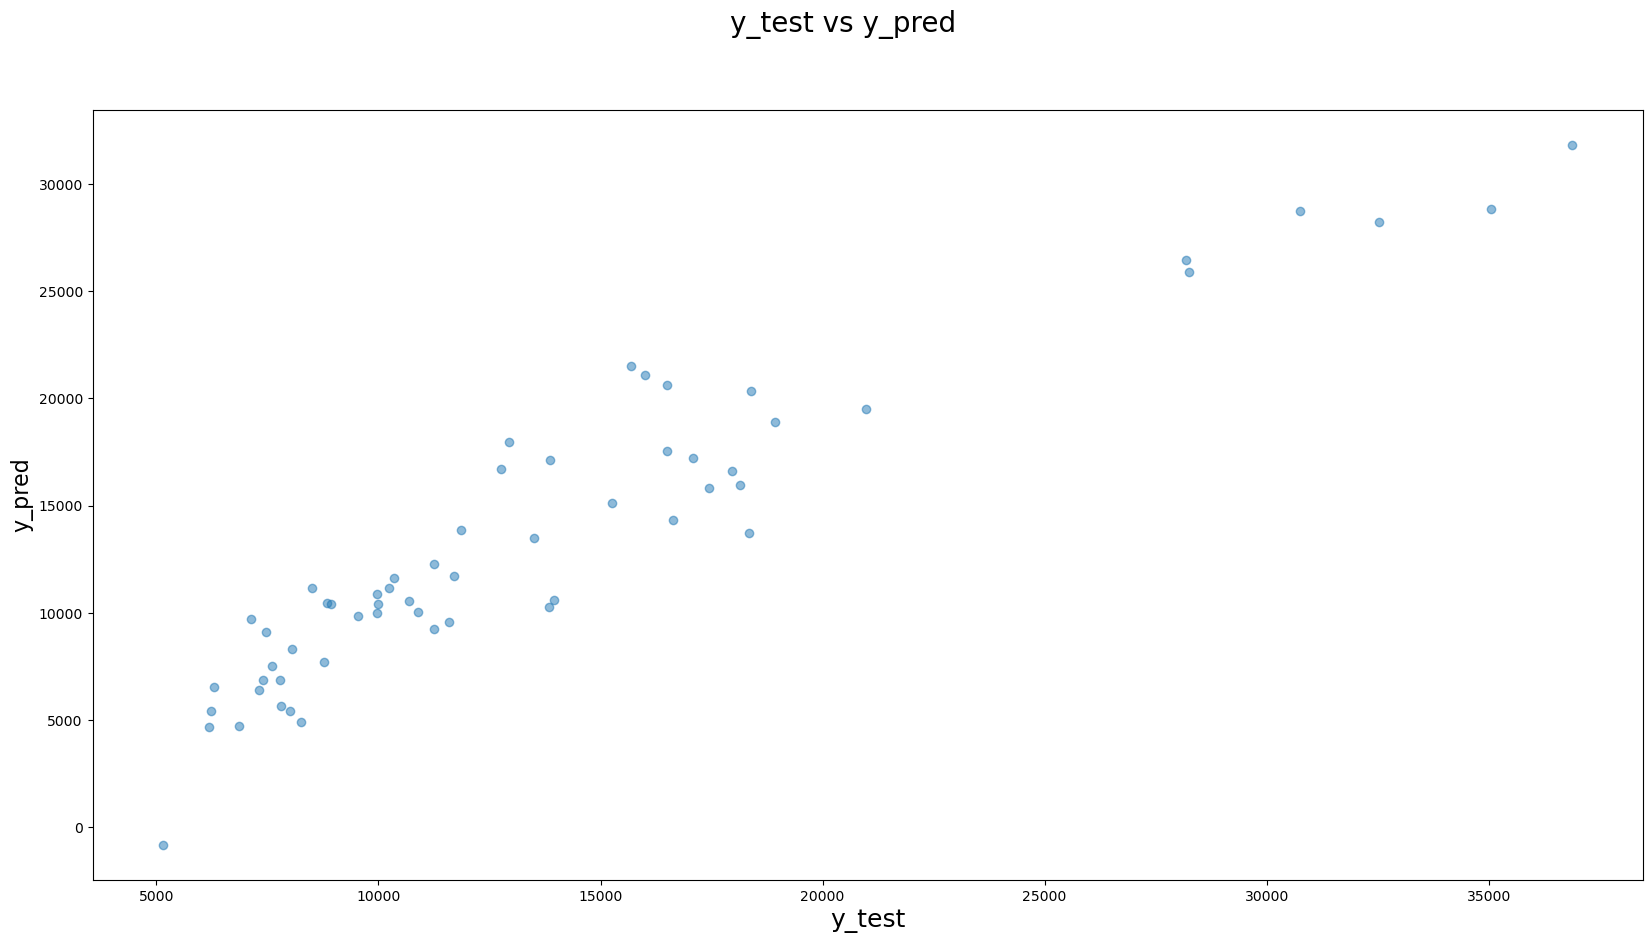

In [60]:
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [61]:
df= pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
df['Predictions']= round(df['Predictions'],2)
df.head()

,Actual,Predictions
119,8495.0,11148.06
128,28176.0,26455.36
11,7788.0,6872.35
136,6189.0,4700.10
134,16503.0,20611.45


In [62]:
from sklearn import metrics 

In [63]:
metrics.explained_variance_score(y_test,y_pred)

0.8764307713443436

In [64]:
metrics.mean_absolute_error(y_test,y_pred)

2019.123201014549

In [65]:
metrics.max_error(y_test,y_pred)

6230.452202398326

In [66]:
metrics.mean_squared_error(y_test,y_pred)

6859858.736695475

In [68]:
metrics.median_absolute_error(y_test,y_pred)

1643.6419623656575

In [69]:
metrics.r2_score(y_test,y_pred)

0.8739254709028653

In [72]:
metrics.mean_tweedie_deviance(y_test,y_pred)

6859858.736695475